In [0]:
%matplotlib inline
from fastai.vision import *
from fastai.metrics import accuracy
import zipfile

In [0]:
# Extract image files to 'dataset' folder
with zipfile.ZipFile("dataset.zip","r") as zip_ref:
    zip_ref.extractall("dataset")

In [0]:
dataset_path = Path('./dataset')

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'
fnames = get_image_files(dataset_path)

In [0]:
data = ImageDataBunch.from_name_re(dataset_path, fnames, pat, bs=32, valid_pct=0.25).normalize(imagenet_stats)

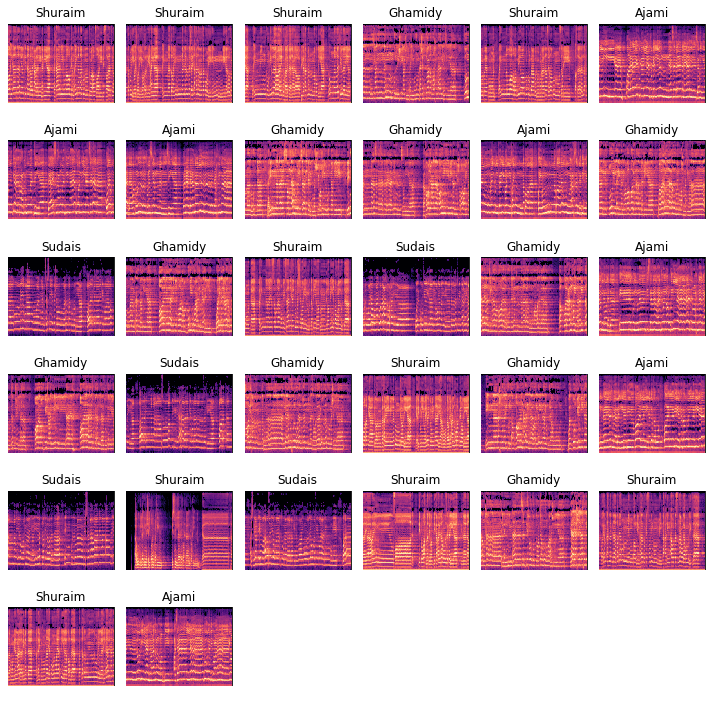

In [15]:
data.show_batch(9, figsize=(10,10))

In [16]:
learner = cnn_learner(data, models.resnet34, metrics=accuracy)
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.982063,0.252422,0.906250,00:02
1,0.449300,0.000116,1.000000,00:02
2,0.274169,0.000009,1.000000,00:02
3,0.186071,0.000005,1.000000,00:02


In [20]:
interp = ClassificationInterpretation.from_learner(learner)

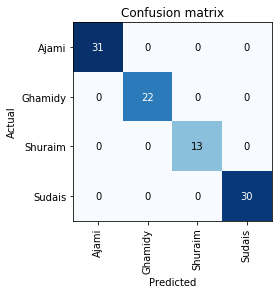

In [21]:
interp.plot_confusion_matrix()